In [18]:
#!/usr/bin/env python3

from mastodon import Mastodon, StreamListener
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
#API_BASE = 'https://dogukankefeli.tech'
class Pure(Mastodon):
    def __init__(self,access_token = '8VonouNApQwu4aqTXcDFkdl-TlrFeR2qR8D4S0lzNdc',
            api_base_url = 'https://mastodon.social'):
        super().__init__(access_token = '8VonouNApQwu4aqTXcDFkdl-TlrFeR2qR8D4S0lzNdc',
            api_base_url = 'https://mastodon.social')
    def title_and_desc(self):
        size = 'width="20" height="20"'
        instance_logs = self.instance()
        title = instance_logs['uri']
        note = instance_logs['short_description']
        desc = note[:note.find('/>')]+size+note[note.find('/>'):]
        return title, desc
    
    def get_timeline_users(self):
        timeline = self.timeline()
        user = []
        for i in range(len(timeline)):
            user.append(timeline[i]['account']['id'])
        self.unique = np.unique(user)
    
    def create_df(self):
        user_ids = []
        usernames = []
        toot_ids = []
        toot_time = []
        toot_favourites_count = []
        content = []
        for user in self.unique:
            statuses = self.account_statuses(user)
            for toot in statuses:
                user_ids.append(toot['account']['id'])
                usernames.append(toot['account']['username'])
                toot_ids.append(toot['id'])
                toot_time.append(toot['created_at'])
                toot_favourites_count.append(toot['favourites_count'])
                soup = BeautifulSoup(toot['content'],features="lxml")
                content.append(soup.get_text())
        data = {}
        data['user_ids'] = user_ids
        data['usernames'] = usernames
        data['toot_ids'] = toot_ids
        data['toot_time'] = toot_time
        data['favourites_count'] = toot_favourites_count
        data['content']=content
        df = pd.DataFrame(data)
        return df

    def get_user_id(self,name):
        """Searches the server for given name and returns the id number of first result""" 
        search_results = self.account_search(name)
        id = search_results[0]['id']
        return id
    
    def get_user_toots(self,id):
        """Returns a dataframe of toots for given user id"""
        username = []
        user_ids = []
        toot_ids = []
        toot_time = []
        toot_favourites_count = []
        content = []
        statuses = self.account_statuses(id,limit=40)
        for toot in statuses:
            user_ids.append(id)
            username.append(toot['account']['username'])
            toot_ids.append(toot['id'])
            toot_time.append(toot['created_at'])
            toot_favourites_count.append(toot['favourites_count'])
            soup = BeautifulSoup(toot['content'],features="lxml")
            content.append(soup.get_text())
        data = {}
        data['user_ids'] = user_ids
        data['username'] = username
        data['toot_ids'] = toot_ids
        data['toot_time'] = toot_time
        data['favourites_count'] = toot_favourites_count
        data['content']=content
        df = pd.DataFrame(data)
        return df


    def timeline_network(self,id=958614):
        
        timeline = self.timeline(limit=200)
        user = {}
        for toot in timeline:
          user[toot['account']['id']] = toot['account']['username']
        source = [] #users
        target = [] #followers

        for key, value in user.items():
          u_follower = self.account_followers(key)
          for k in u_follower:
              source.append(value)
              target.append(k['username'])
        df = pd.DataFrame()
        df['Source'] = source
        df['Target'] = target
        df['Weight'] = 0.1
        return df

    def followings_network(self,id=958614):
        username = self.account(id)['username']

        followings = self.account_following(id)
        users={}
        source = [] #users
        target = [] #followers
        for following in followings:
            users[following['id']]=following['username']
            source.append(username)
            target.append(following['username'])

        for key, value in users.items():
            u_follower = self.account_following(key)
            for k in u_follower:
                source.append(value)
                target.append(k['username'])
        df = pd.DataFrame()
        df['Source'] = source
        df['Target'] = target
        df['Weight'] = 0.1
        df.loc[df['Source']==username,'Weight']=0.2
        return df



    def account_info(self,id=106555351749444654):

        acc_dict = self.account(id)
        smtxt="""
        <html lang="en" ng-app="myApp" class="ng-scope"><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><style type="text/css">[uib-typeahead-popup].dropdown-menu{display:block;}</style><style type="text/css">.uib-time input{width:50px;}</style><style type="text/css">[uib-tooltip-popup].tooltip.top-left > .tooltip-arrow,[uib-tooltip-popup].tooltip.top-right > .tooltip-arrow,[uib-tooltip-popup].tooltip.bottom-left > .tooltip-arrow,[uib-tooltip-popup].tooltip.bottom-right > .tooltip-arrow,[uib-tooltip-popup].tooltip.left-top > .tooltip-arrow,[uib-tooltip-popup].tooltip.left-bottom > .tooltip-arrow,[uib-tooltip-popup].tooltip.right-top > .tooltip-arrow,[uib-tooltip-popup].tooltip.right-bottom > .tooltip-arrow,[uib-tooltip-html-popup].tooltip.top-left > .tooltip-arrow,[uib-tooltip-html-popup].tooltip.top-right > .tooltip-arrow,[uib-tooltip-html-popup].tooltip.bottom-left > .tooltip-arrow,[uib-tooltip-html-popup].tooltip.bottom-right > .tooltip-arrow,[uib-tooltip-html-popup].tooltip.left-top > .tooltip-arrow,[uib-tooltip-html-popup].tooltip.left-bottom > .tooltip-arrow,[uib-tooltip-html-popup].tooltip.right-top > .tooltip-arrow,[uib-tooltip-html-popup].tooltip.right-bottom > .tooltip-arrow,[uib-tooltip-template-popup].tooltip.top-left > .tooltip-arrow,[uib-tooltip-template-popup].tooltip.top-right > .tooltip-arrow,[uib-tooltip-template-popup].tooltip.bottom-left > .tooltip-arrow,[uib-tooltip-template-popup].tooltip.bottom-right > .tooltip-arrow,[uib-tooltip-template-popup].tooltip.left-top > .tooltip-arrow,[uib-tooltip-template-popup].tooltip.left-bottom > .tooltip-arrow,[uib-tooltip-template-popup].tooltip.right-top > .tooltip-arrow,[uib-tooltip-template-popup].tooltip.right-bottom > .tooltip-arrow,[uib-popover-popup].popover.top-left > .arrow,[uib-popover-popup].popover.top-right > .arrow,[uib-popover-popup].popover.bottom-left > .arrow,[uib-popover-popup].popover.bottom-right > .arrow,[uib-popover-popup].popover.left-top > .arrow,[uib-popover-popup].popover.left-bottom > .arrow,[uib-popover-popup].popover.right-top > .arrow,[uib-popover-popup].popover.right-bottom > .arrow,[uib-popover-html-popup].popover.top-left > .arrow,[uib-popover-html-popup].popover.top-right > .arrow,[uib-popover-html-popup].popover.bottom-left > .arrow,[uib-popover-html-popup].popover.bottom-right > .arrow,[uib-popover-html-popup].popover.left-top > .arrow,[uib-popover-html-popup].popover.left-bottom > .arrow,[uib-popover-html-popup].popover.right-top > .arrow,[uib-popover-html-popup].popover.right-bottom > .arrow,[uib-popover-template-popup].popover.top-left > .arrow,[uib-popover-template-popup].popover.top-right > .arrow,[uib-popover-template-popup].popover.bottom-left > .arrow,[uib-popover-template-popup].popover.bottom-right > .arrow,[uib-popover-template-popup].popover.left-top > .arrow,[uib-popover-template-popup].popover.left-bottom > .arrow,[uib-popover-template-popup].popover.right-top > .arrow,[uib-popover-template-popup].popover.right-bottom > .arrow{top:auto;bottom:auto;left:auto;right:auto;margin:0;}[uib-popover-popup].popover,[uib-popover-html-popup].popover,[uib-popover-template-popup].popover{display:block !important;}</style><style type="text/css">.uib-datepicker-popup.dropdown-menu{display:block;float:none;margin:0;}.uib-button-bar{padding:10px 9px 2px;}</style><style type="text/css">.uib-position-measure{display:block !important;visibility:hidden !important;position:absolute !important;top:-9999px !important;left:-9999px !important;}.uib-position-scrollbar-measure{position:absolute !important;top:-9999px !important;width:50px !important;height:50px !important;overflow:scroll !important;}.uib-position-body-scrollbar-measure{overflow:scroll !important;}</style><style type="text/css">.uib-datepicker .uib-title{width:100%;}.uib-day button,.uib-month button,.uib-year button{min-width:100%;}.uib-left,.uib-right{width:100%}</style><style type="text/css">.ng-animate.item:not(.left):not(.right){-webkit-transition:0s ease-in-out left;transition:0s ease-in-out left}</style><style type="text/css">@charset "UTF-8";[ng\:cloak],[ng-cloak],[data-ng-cloak],[x-ng-cloak],.ng-cloak,.x-ng-cloak,.ng-hide:not(.ng-hide-animate){display:none !important;}ng\:form{display:block;}.ng-animate-shim{visibility:hidden;}.ng-anchor{position:absolute;}</style>
        """
        full_text = """
          <!--<base href="/">--><base href=".">
          <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.4.0/css/bootstrap.min.css">
          <link rel="stylesheet" href="https://botometer.osome.iu.edu/static/bower_components/bootstrap/dist/css/bootstrap.min.css">
          <script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.4.0/js/bootstrap.min.js"></script>
          <link rel="stylesheet" href="https://botometer.osome.iu.edu/static/app.css">
        </head>
        <body>
            <div role="main" class="container">
                <!-- ngView: --><div ng-view="" class="ng-scope"><h1 class="user-detail-screen-name ng-binding ng-scope">
              @{username}
              <icon-verified user="user" class="ng-isolate-scope"><!-- ngIf: user.userData.verified --></icon-verified>
            </h1>
            <a class="user-detail-profile-link ng-scope" ng-href="https://mastodon.social/@{username}" href="https://mastodon.social/@{username}">
              <i class="glyphicon glyphicon-user"></i>
            </a>
            <div class="user-detail-banner-container ng-scope">
              <img class="user-detail-banner-img" ng-src="{header_static}" src="{header_static}">
              <img class="user-detail-profile-img img-circle" ng-src="{avatar_static}" src="{avatar_static}">
            </div>
            <div class="row ng-scope">
              <div class="col-sm-8 col-md-6">
                <dl class="dl-horizontal">
                  <dt>Screen name</dt>
                  <dd ng-show="user.userData" class="ng-binding">@{username}</dd>
                  <dt>Display name</dt>
                  <dd class="ng-binding">{display_name}</dd>
                  <dt>Description</dt>
                  <dd class="ng-binding">{note}</dd>
                  <dt>URL</dt>
                  <dd><a href="{url}">{url}</a></dd>
                </dl>
              </div>
              <div class="col-sm-4">
                <dl class="dl-horizontal">
                  <dt>Toots</dt>
                  <dd class="ng-binding">{statuses_count}</dd>
                  <dt>Following</dt>
                  <dd class="ng-binding">{following_count}</dd>
                  <dt>Followers</dt>
                  <dd class="ng-binding">{followers_count}</dd>
                </dl>
              </div>
            </div>
        <dl class="dl-horizontal ng-scope">
            <dt>Mastodon user ID</dt>
            <dd class="ng-binding">{id}</dd>
        </dl>
        </div>
          </div>
        """.format(id=acc_dict['id'],header_static=acc_dict['header_static'],avatar_static=acc_dict['avatar_static'],username=acc_dict['username'],display_name=acc_dict['display_name'],note=acc_dict['note'],url=acc_dict['url'],statuses_count=acc_dict['statuses_count'],following_count=acc_dict['following_count'],followers_count=acc_dict['followers_count'])

        Html_file = open("profile.html","w")
        Html_file.write(full_text)
        Html_file.close()

In [19]:
from pure import Pure

In [20]:
pure = Pure()

In [6]:
import pandas as pd
minid=0
followings = pure.account_following(149988)
df = pd.DataFrame(followings)
more_followings = []
for _ in range(10):
    minid = df['id'].max()
    followings = pure.account_following(149988,min_id=minid)
    more_followings+=followings
    df2 = pd.DataFrame(followings)
    df = df.append(df2,ignore_index=True)
df

,id,username,acct,display_name,locked,bot,discoverable,group,created_at,note,...,avatar,avatar_static,header,header_static,followers_count,following_count,statuses_count,last_status_at,emojis,fields
0,106189924613655082,bookwyrm,bookwyrm@tech.lgbt,BookWyrm,False,False,True,False,2021-05-06 00:00:00+00:00,<p>A federated reading platform.</p>,...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/h...,https://files.mastodon.social/cache/accounts/h...,401,5,35,2021-08-18,[],"[{'name': 'Code', 'value': '<a href=""https://g..."
1,1252263,acererak,acererak@writing.exchange,succinctly salient,False,False,True,False,2020-07-28 00:00:00+00:00,<p>Lich by day; writing poems when not coding<...,...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/h...,https://files.mastodon.social/cache/accounts/h...,22,29,277,2021-08-19,[],"[{'name': 'Age', 'value': '238', 'verified_at'..."
2,106451688183170418,mysticsymbot,mysticsymbot@neenster.org,MysticSymbot,False,False,False,False,2021-06-22 00:00:00+00:00,,...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/a...,https://mastodon.social/headers/original/missi...,https://mastodon.social/headers/original/missi...,22,0,130,2021-08-23,[],[]
3,106704871185429094,leliboli,leliboli@polyglot.city,Veronica,True,False,False,False,2021-07-24 00:00:00+00:00,<p>en / ru / de / (sv) / (fr)</p>,...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/h...,https://files.mastodon.social/cache/accounts/h...,94,22,13,2021-08-23,[],"[{'name': 'Pronouns', 'value': 'she/her', 'ver..."
4,106702995595872553,TQ,TQ@weirder.earth,TQ 🎹,True,False,True,False,2021-08-05 00:00:00+00:00,<p>Jackfruit of all trades. Old as in Walkman....,...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/h...,https://files.mastodon.social/cache/accounts/h...,710,56,374,2021-08-23,[],"[{'name': 'Pronouns', 'value': 'she/her | they..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,1378740,Molly,Molly@ausglam.space,Molly,False,False,False,False,2021-01-28 00:00:00+00:00,"<p>A librarian, geek and fiber artist with too...",...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/h...,https://files.mastodon.social/cache/accounts/h...,4,9,89,2021-02-21,[],[]
436,1211417,claudiom,claudiom@mastodon.sdf.org,ClaudioM,True,False,False,False,2020-05-17 00:00:00+00:00,<p>I'm a computer geek with a musical flare. ...,...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/h...,https://files.mastodon.social/cache/accounts/h...,866,810,15425,2021-08-23,[],"[{'name': 'Linux Distros?', 'value': 'Fedora, ..."
437,1379458,calluna,calluna@mstdn.social,TheAltC,True,False,False,False,2021-01-30 00:00:00+00:00,"<p>My ducks are not in a row. At this point, ...",...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/h...,https://files.mastodon.social/cache/accounts/h...,51,98,74,2021-05-02,[],[]
438,1281624,RTP,RTP@fosstodon.org,(RTP) Privacy & Tech Tips,False,False,True,False,2020-09-15 00:00:00+00:00,"<p><a href=""https://fosstodon.org/tags/Linux"" ...",...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/h...,https://files.mastodon.social/cache/accounts/h...,444,104,1446,2021-08-23,[],[]


In [7]:
from pure import Pure
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [8]:

def toots_text(id=958614):
    
    minid=0
    toots = pure.account_statuses(id)
    df = pd.DataFrame(toots)
    toots_info_list = [toots][0]
    main_text = ""
    for toot in toots_info_list:
        text= toot['content']
        main_text += text + " "
    main_text = cleanhtml(main_text)
    return main_text
    

def cleanhtml(raw_html):
    import re
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext
 
def word_cloud(text):
    text = text.lower()
    stopwords = {"i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"}
    wordcl = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words= 2000).generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcl, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    



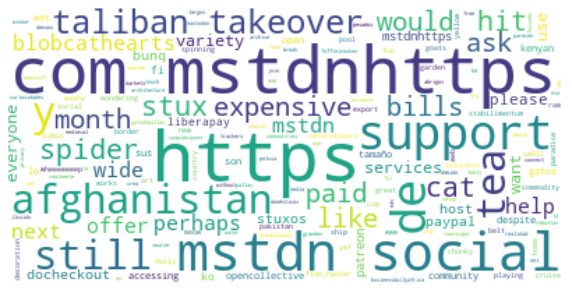

In [9]:
text = toots_text().lower()  
stopwords = {"i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"}
wordcl = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words= 2000).generate(text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
image = wordcl.to_image()

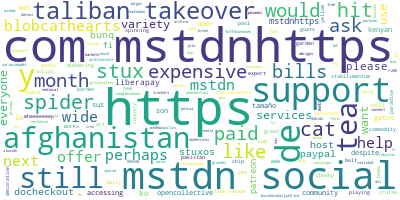

In [11]:
image

In [12]:
def toots(id=958614):
    minid=0
    toots = pure.account_statuses(id)
    df = pd.DataFrame(toots)
    toots_list = [toots][0]
    main_text = ""
    for toot in toots_list:
        text= toot['content']
        main_text += text + " "
    main_text = cleanhtml(main_text)

    for _ in range(10):
        minid = df['id'].min()
        toots_2 = pure.account_statuses(149988, max_id =minid)
        df2 = pd.DataFrame(toots)
        toots_list2 = [toots_2][0]
        sub_text = ""
        for toot in toots_list2:
            text= toot['content']
            sub_text += text + " "
        sub_text = cleanhtml(sub_text)
        main_text+=sub_text
        
    return main_text
        
toots()
            
            
            
      
    
        

        



"#cat #art @stux me wondering who is that in my home.. Yellow garden #spider spinning a web decoration or stabilimentum Why u hit me?! Spider goats 🐐 Just a ram having some fun 🐏 The new belt works great! Playing pool on a cruise ship 🛳 Sm0ll meow #Washy Wheeeeeeep Chonky #Cat It was an very expensive month again, but all bills are paid for again❤️ I would like to ask you if you can perhaps help me out with this? :blobcathearts: Next to #mstdn we offer a wide variety of services for everyone to use. If you want to support me in this please doCheckout what we host for you: https://mstdn.social/about/more#other https://paypal.me/stuxOS https://bunq.me/mstdnhttps://patreon.com/mstdnhttps://liberapay.com/mstdnhttps://ko-fi.com/mstdnhttps://opencollective.com/mstdnhttps://mstdn.social/about/more#support-the-community Naturelovers❣️PARADISE 🏗️ :flan_hacker: The Taliban takeover of Afghanistan is yet to hit the export of tea to that country as most of the commodity is still accessing Kabul th

In [13]:
df

,id,username,acct,display_name,locked,bot,discoverable,group,created_at,note,...,avatar,avatar_static,header,header_static,followers_count,following_count,statuses_count,last_status_at,emojis,fields
0,106189924613655082,bookwyrm,bookwyrm@tech.lgbt,BookWyrm,False,False,True,False,2021-05-06 00:00:00+00:00,<p>A federated reading platform.</p>,...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/h...,https://files.mastodon.social/cache/accounts/h...,401,5,35,2021-08-18,[],"[{'name': 'Code', 'value': '<a href=""https://g..."
1,1252263,acererak,acererak@writing.exchange,succinctly salient,False,False,True,False,2020-07-28 00:00:00+00:00,<p>Lich by day; writing poems when not coding<...,...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/h...,https://files.mastodon.social/cache/accounts/h...,22,29,277,2021-08-19,[],"[{'name': 'Age', 'value': '238', 'verified_at'..."
2,106451688183170418,mysticsymbot,mysticsymbot@neenster.org,MysticSymbot,False,False,False,False,2021-06-22 00:00:00+00:00,,...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/a...,https://mastodon.social/headers/original/missi...,https://mastodon.social/headers/original/missi...,22,0,130,2021-08-23,[],[]
3,106704871185429094,leliboli,leliboli@polyglot.city,Veronica,True,False,False,False,2021-07-24 00:00:00+00:00,<p>en / ru / de / (sv) / (fr)</p>,...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/h...,https://files.mastodon.social/cache/accounts/h...,94,22,13,2021-08-23,[],"[{'name': 'Pronouns', 'value': 'she/her', 'ver..."
4,106702995595872553,TQ,TQ@weirder.earth,TQ 🎹,True,False,True,False,2021-08-05 00:00:00+00:00,<p>Jackfruit of all trades. Old as in Walkman....,...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/h...,https://files.mastodon.social/cache/accounts/h...,710,56,374,2021-08-23,[],"[{'name': 'Pronouns', 'value': 'she/her | they..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,1378740,Molly,Molly@ausglam.space,Molly,False,False,False,False,2021-01-28 00:00:00+00:00,"<p>A librarian, geek and fiber artist with too...",...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/h...,https://files.mastodon.social/cache/accounts/h...,4,9,89,2021-02-21,[],[]
436,1211417,claudiom,claudiom@mastodon.sdf.org,ClaudioM,True,False,False,False,2020-05-17 00:00:00+00:00,<p>I'm a computer geek with a musical flare. ...,...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/h...,https://files.mastodon.social/cache/accounts/h...,866,810,15425,2021-08-23,[],"[{'name': 'Linux Distros?', 'value': 'Fedora, ..."
437,1379458,calluna,calluna@mstdn.social,TheAltC,True,False,False,False,2021-01-30 00:00:00+00:00,"<p>My ducks are not in a row. At this point, ...",...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/h...,https://files.mastodon.social/cache/accounts/h...,51,98,74,2021-05-02,[],[]
438,1281624,RTP,RTP@fosstodon.org,(RTP) Privacy & Tech Tips,False,False,True,False,2020-09-15 00:00:00+00:00,"<p><a href=""https://fosstodon.org/tags/Linux"" ...",...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/a...,https://files.mastodon.social/cache/accounts/h...,https://files.mastodon.social/cache/accounts/h...,444,104,1446,2021-08-23,[],[]


In [14]:
from PIL import Image
mask = np.array(Image.open('img/mmm.png'))



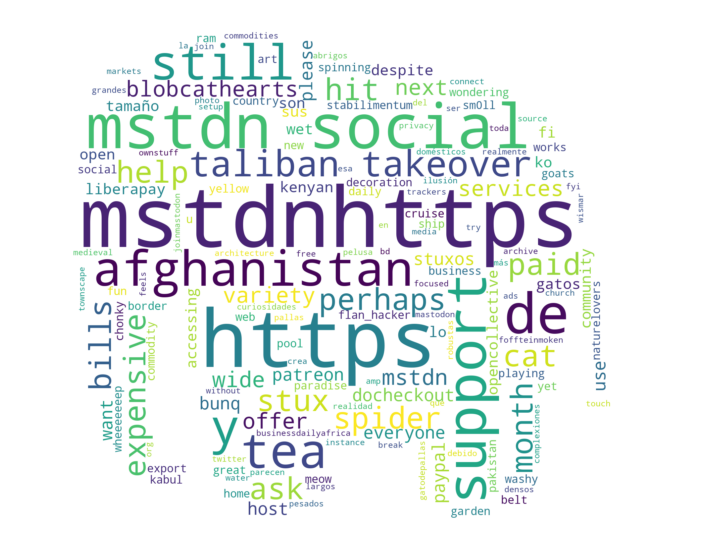

In [15]:
wc = WordCloud(background_color='white', mask=mask, mode='RGB', 
              width=1000, max_words=200, height=1000,
              random_state=1)
wc.generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [ ]:
from mastodon import Mastodon


Mastodon.create_app(
     'pure_app',
     api_base_url = 'https://mastodon.social',
     to_file = 'pytooter_clientcred.secret'
)


In [ ]:
mastodon = Mastodon(
    client_id = 'pytooter_clientcred.secret',
    api_base_url = 'https://mastodon.social'
)
mastodon.log_in(
    'zavutyse@digital10network.com',
    'T7DAqKgAa@TS.jh',
    to_file = 'pytooter_usercred.secret'
)

In [ ]:
mastodon = Mastodon(
    access_token = 'pytooter_usercred.secret',
    api_base_url = 'https://mastodon.social'
)
#mastodon.toot('Tooting from python using #mastodonpy !')

In [ ]:
class Listener(StreamListener):
    def on_notification(self, ntf):
        if ntf["type"] == "mention":
            content = html_to_text(ntf["status"]["content"])
            req = content.split(" ")[1]
            if content.startswith("GET "):
                masto.status_reply(ntf["status"], get(req))
            elif content.startswith("POST "):
                masto.status_reply(ntf["status"], post(req))
            elif content.startswith("DELETE "):
                masto.status_favourite(ntf["status"]["id"])
        # ... and everything else.

listener = Listener()
mastodon.stream_user(listener)

In [2]:
!pip install mastobot


  Using cached mastobot-0.2.1-py3-none-any.whl (16 kB)
  Using cached websockets-9.1-cp39-cp39-macosx_10_9_x86_64.whl (88 kB)


In [3]:
from mastobot import Bot

In [5]:
bot = Bot(
    instance_url="https://mastodon.social",
    access_token="NaaVC6ZOQY1Yf1Oz06XizwtPhynbTy16BuuNEpFAGPs",
)

@bot.on_mention("hi")
def respond_to_hi(status):
    name = status.account.username
    return f"hey, {name}!"

bot.run()

Connected to https://mastodon.social


ConnectionError: HTTPSConnectionPool(host='mastodon.social', port=443): Read timed out.